In [15]:
# Load data
wbcd <- read.csv("wisc_bc_data.csv", stringsAsFactors = TRUE)
# Remove ID
wbcd <- wbcd[-1]
# Re-code diagnosis (Benign vs Malignant) as a variable containing 0 (for benign) and 1 (for malignant)
wbcd$diagnosis <- ifelse(wbcd$diagnosis == "B", 0, 1)
# Display the structure of the dataset
str(wbcd)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis        : num  0 0 0 0 0 0 0 1 0 0 ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  17.4 27.1 13.5 26.3 17.7 ...
 $ smoothness_se    : num  0.00805 0.00747 0.00516 0.01127 0.00501 ...


In [16]:
# Define the training and testing datasets with labels
wbcd_train <- wbcd[1:469, ]
wbcd_test <- wbcd[470:569, ]

In [17]:
# Checking proportions of malignant vs benign in train and test
round(proportions(table(wbcd$diagnosis)) * 100, digits = 1)
round(proportions(table(wbcd_train$diagnosis)) * 100, digits = 1)
round(proportions(table(wbcd_test$diagnosis)) * 100, digits = 1)


   0    1 
62.7 37.3 


   0    1 
63.1 36.9 


 0  1 
61 39 

In [18]:
# Create the logistic model using all of the training data (and increasing the maximum number of iterations to 100)
wbcd_glm <- glm(diagnosis ~ ., data = wbcd_train, family = binomial, maxit = 100)

# Summary of the trained model
summary(wbcd_glm)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial, data = wbcd_train, 
    maxit = 100)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.019e-05  -2.110e-08  -2.110e-08   2.110e-08   1.181e-05  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)       -7.645e+01  1.167e+07   0.000        1
radius_mean       -2.145e+03  9.267e+06   0.000        1
texture_mean       2.109e+01  1.925e+05   0.000        1
perimeter_mean     1.371e+02  1.190e+06   0.000        1
area_mean          1.242e+01  2.101e+04   0.001        1
smoothness_mean    1.968e+04  1.053e+08   0.000        1
compactness_mean  -1.817e+04  5.307e+07   0.000        1
concavity_mean     7.694e+03  4.268e+07   0.000        1
points_mean        7.710e+03  6.835e+07   0.000        1
symmetry_mean     -7.615e+03  1.576e+07   0.000        1
dimension_mean     1.002e+04  2.711e+08   0.000        1
radius_se          8.907e+02  1.495e+07   0.000        1
texture_

In [19]:
# Apply the logistic model wbcd_glm to the test set wbcd_test to predict the probability of malignancy for each example
wbcd_glm_prob <- predict(wbcd_glm, wbcd_test, type = "response")

# Check the quartile summary of the output
summary(wbcd_glm_prob)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00    0.42    1.00    1.00 

In [20]:
# If the probability is > 0.5, output 1; otherwise output 0
wbcd_glm_pred <- ifelse(wbcd_glm_prob > 0.5, 1, 0)

# Check the totals for each class label
table(wbcd_glm_pred)

wbcd_glm_pred
 0  1 
58 42 

In [21]:
# Load the library with CrossTable()
library(gmodels)

# Generate the confusion matrix with the test labels and predictions
CrossTable(wbcd_test$diagnosis, wbcd_glm_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        58 |         3 |        61 | 
-------------|-----------|-----------|-----------|
           1 |         0 |        39 |        39 | 
-------------|-----------|-----------|-----------|
Column Total |        58 |        42 |       100 | 
-------------|-----------|-----------|-----------|

 


In [22]:
# Set a random generator seed for reproducibility of the results
set.seed(137)

# Generate a random selection of 469 out of 569 indices for the training set
train_ID <- sample(569, 469, replace = FALSE)

# Define the training and test datasets
wbcd_train <- wbcd[train_ID, ]
wbcd_test <- wbcd[-train_ID, ]

# Recall the proportions of labels in each subset
round(proportions(table(wbcd$diagnosis)) * 100, digits = 1)
round(proportions(table(wbcd_train$diagnosis)) * 100, digits = 1)
round(proportions(table(wbcd_test$diagnosis)) * 100, digits = 1)
# Create the logistic model using all of the training data (and increasing the maximum number of iterations to 100)
wbcd_glm <- glm(diagnosis ~ ., data = wbcd_train, family = binomial, maxit = 100)

# Summary of the trained model
summary(wbcd_glm)

# Apply the logistic model wbcd_glm to the test set wbcd_test to predict the probability of malignancy for each example
wbcd_glm_prob <- predict(wbcd_glm, wbcd_test, type = "response")


# If the probability is > 0.5, output 1; otherwise output 0
wbcd_glm_pred <- ifelse(wbcd_glm_prob > 0.5, 1, 0)

# Check the totals for each class label
table(wbcd_glm_pred)

# Generate the confusion matrix with the test labels and predictions
CrossTable(wbcd_test$diagnosis, wbcd_glm_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)


   0    1 
62.7 37.3 


 0  1 
62 38 


 0  1 
66 34 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial, data = wbcd_train, 
    maxit = 100)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
                    Estimate Std. Error    z value Pr(>|z|)    
(Intercept)       -1.631e+16  1.321e+08 -123406702   <2e-16 ***
radius_mean        1.961e+14  5.501e+07    3565103   <2e-16 ***
texture_mean       2.941e+13  2.649e+06   11102646   <2e-16 ***
perimeter_mean     1.221e+14  8.051e+06   15170855   <2e-16 ***
area_mean         -1.148e+13  1.601e+05  -71699059   <2e-16 ***
smoothness_mean    4.948e+15  6.222e+08    7952710   <2e-16 ***
compactness_mean  -3.086e+16  4.158e+08  -74205779   <2e-16 ***
concavity_mean     6.897e+15  3.188e+08   21634239   <2e-16 ***
points_mean        1.817e+16  6.034e+08   30112920   <2e-16 ***
symmetry_mean     -8.615e+15  2.262e+08  -38091246   <2e-16 ***
dimension_mean     4.936e+16  1.735e+09   28446746   <2e-16 ***
radius_se          1.

wbcd_glm_pred
 0  1 
66 34 


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        64 |         2 |        66 | 
-------------|-----------|-----------|-----------|
           1 |         2 |        32 |        34 | 
-------------|-----------|-----------|-----------|
Column Total |        66 |        34 |       100 | 
-------------|-----------|-----------|-----------|

 


In [23]:
library(glmnet)

In [24]:
# Define the training and testing datasets
wbcd_train <- wbcd[1:469, ]
wbcd_test <- wbcd[470:569, ]

# Create model matrices for the training and test datasets
wbcd_train_glmnet <- model.matrix(diagnosis ~ ., data = wbcd_train)
wbcd_test_glmnet <- model.matrix(diagnosis ~ ., data = wbcd_test)

In [25]:
# Train the logistic model with no regularization
model_no_reg <- glmnet(wbcd_train_glmnet, wbcd_train$diagnosis, alpha = 1, family = "binomial", lambda = 0)

# Display the coefficients of the model for comparison with glm()
coef(model_no_reg)

# Predict probabilities using the test dataset
wbcd_test_prob <- predict(model_no_reg, wbcd_test_glmnet, type = "response")

# Convert probabilities to class levels 1 or 0
wbcd_test_pred <- ifelse(wbcd_test_prob > 0.5, 1, 0)

# Generate the confusion matrix with the test labels and predictions
CrossTable(wbcd_test$diagnosis, wbcd_test_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)

32 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)       -4.359251e+01
(Intercept)        .           
radius_mean       -2.766511e+02
texture_mean       3.245064e+00
perimeter_mean     1.571031e+01
area_mean          1.693545e+00
smoothness_mean    2.749453e+03
compactness_mean  -2.669920e+03
concavity_mean     1.219823e+03
points_mean        1.097879e+03
symmetry_mean     -1.187786e+03
dimension_mean     1.097166e+03
radius_se          2.674124e+02
texture_se        -2.067578e+01
perimeter_se      -3.949912e+01
area_se            3.317821e+00
smoothness_se     -9.412580e+01
compactness_se     4.676891e+03
concavity_se      -3.184862e+03
points_se          1.352386e+04
symmetry_se       -5.146598e+03
dimension_se      -4.604772e+04
radius_worst       5.883076e+01
texture_worst      4.408668e+00
perimeter_worst    7.577855e-01
area_worst        -3.601159e-01
smoothness_worst  -8.530473e+02
compactness_worst -2.746262e+02
concavity_worst    2.670327e+0


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        58 |         3 |        61 | 
-------------|-----------|-----------|-----------|
           1 |         0 |        39 |        39 | 
-------------|-----------|-----------|-----------|
Column Total |        58 |        42 |       100 | 
-------------|-----------|-----------|-----------|

 


[1] 0.003044609

32 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)       -2.859672e+01
(Intercept)        .           
radius_mean        .           
texture_mean       .           
perimeter_mean     .           
area_mean          .           
smoothness_mean    .           
compactness_mean   .           
concavity_mean     1.144579e+01
points_mean        6.465883e+00
symmetry_mean      .           
dimension_mean     .           
radius_se          8.233507e+00
texture_se        -2.671486e-01
perimeter_se       .           
area_se            .           
smoothness_se      3.651686e+01
compactness_se    -1.045768e+01
concavity_se       .           
points_se          .           
symmetry_se        .           
dimension_se      -2.085170e+02
radius_worst       6.732115e-01
texture_worst      2.255107e-01
perimeter_worst    .           
area_worst         2.226230e-05
smoothness_worst   3.030578e+01
compactness_worst  .           
concavity_worst    1.574838e-0


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        58 |         3 |        61 | 
-------------|-----------|-----------|-----------|
           1 |         0 |        39 |        39 | 
-------------|-----------|-----------|-----------|
Column Total |        58 |        42 |       100 | 
-------------|-----------|-----------|-----------|

 


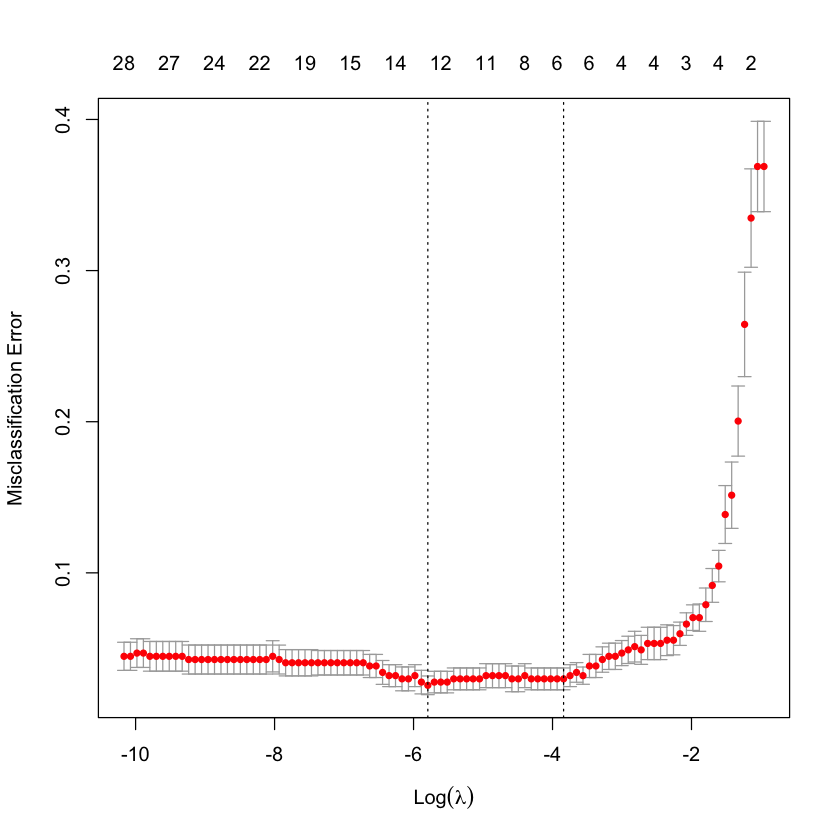

In [26]:
cv.lasso <- cv.glmnet(wbcd_train_glmnet, wbcd_train$diagnosis, alpha = 1, family = "binomial", type.measure = "class")

# Plot the result of cross-validation
plot(cv.lasso)

# Display the best value of lambda
cv.lasso$lambda.min

# Train the logistic model with the lasso regularization
model_lasso <- glmnet(wbcd_train_glmnet, wbcd_train$diagnosis, alpha = 1, family = "binomial", lambda = cv.lasso$lambda.min)

# Display the coefficients of the model for comparison with glm() and glmnet(..., lambda = 0)
coef(model_lasso)

# Predict probabilities using the test dataset
wbcd_test_prob <- predict(model_lasso, wbcd_test_glmnet, type = "response")

# Convert probabilities to class levels 1 or 0
wbcd_test_pred <- ifelse(wbcd_test_prob > 0.30, 1, 0)

# Generate the confusion matrix with the test labels and predictions
CrossTable(wbcd_test$diagnosis, wbcd_test_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)

**QUESTION 1**

[1] 0.0225956

32 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)       -1.899096e+01
(Intercept)        .           
radius_mean        9.890219e-02
texture_mean       8.779293e-02
perimeter_mean     1.425475e-02
area_mean          9.391429e-04
smoothness_mean    1.195452e+01
compactness_mean   6.766671e-01
concavity_mean     4.683310e+00
points_mean        1.190230e+01
symmetry_mean      1.321852e+00
dimension_mean    -2.932191e+01
radius_se          1.699945e+00
texture_se        -6.106082e-02
perimeter_se       1.824425e-01
area_se            7.553028e-03
smoothness_se      2.400390e+01
compactness_se    -1.278985e+01
concavity_se      -2.300770e+00
points_se          2.337868e+01
symmetry_se       -1.567837e+01
dimension_se      -9.636318e+01
radius_worst       9.831748e-02
texture_worst      8.772976e-02
perimeter_worst    1.312581e-02
area_worst         7.394153e-04
smoothness_worst   1.824793e+01
compactness_worst  9.249432e-01
concavity_worst    1.712387e+0


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        61 |         0 |        61 | 
-------------|-----------|-----------|-----------|
           1 |         0 |        39 |        39 | 
-------------|-----------|-----------|-----------|
Column Total |        61 |        39 |       100 | 
-------------|-----------|-----------|-----------|

 


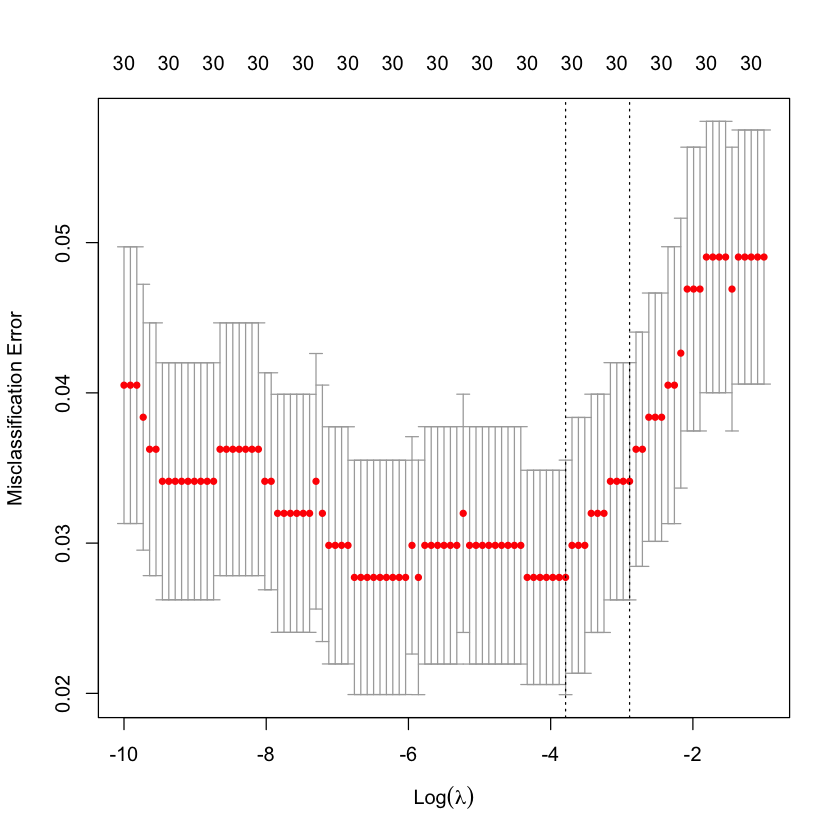

In [27]:
cv.ridge <- cv.glmnet(wbcd_train_glmnet, wbcd_train$diagnosis, alpha = 0, family = "binomial", type.measure = "class", lambda = exp(seq(from = -10, to = -1, length.out = 101)))

# Plot the result of cross-validation
plot(cv.ridge)

# Display the best value of lambda
cv.ridge$lambda.min

# Train the logistic model with the lasso regularization
model_ridge <- glmnet(wbcd_train_glmnet, wbcd_train$diagnosis, alpha = 0, family = "binomial", lambda = cv.ridge$lambda.min)

# Display the coefficients of the model for comparison with glm() and glmnet(..., lambda = 0)
coef(model_ridge)

# Predict probabilities using the test dataset
wbcd_test_prob <- predict(model_ridge, wbcd_test_glmnet, type = "response")

# Convert probabilities to class levels 1 or 0
wbcd_test_pred <- ifelse(wbcd_test_prob > 0.4, 1, 0)

# Generate the confusion matrix with the test labels and predictions
CrossTable(wbcd_test$diagnosis, wbcd_test_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)

**Q 1A** 
The best lambda was found to be around 0.00489 for this model
When the test data was run with this data, the accuracy was 98/100 = 98%. 

**Q 1B**
Non-regularized gave 3 wrong predictions, and some huge error.
Lasso regularization gave 2 wrong predictions, and found a low lambda.
Ridge regularization gave 0 wrong predictions, and had a similar lambda to the lasso regularization. 

**Q 1C**
For no regularization: it spans between 10^0 and 10^4, which is a huge difference.
Lasso regularization: About 50% of factors are considered irrelevant, and the rest are between 10^-1 and 10^1. Pretty tight. Nice.
For Ridge regularization: All factors are considered relevant, but the coefficients span between 10^-04 and 10^1. So many coefficients are essentially useless because of the coefficient. But still is quite nice and tight. 

**Q 2A**
We would want to decrease it to from 0.5 to something lower. By doing that, more of the fringe cases will be predicted as positive. This leans errors towards more false positives instead of false negatives, which in the case of cancerous cells is what we want.

**Q 2B**
For the lasso, the cutoff is set to 0.3. This kept the accuracy the same (97%), but instead of being all false negatives, there are more false positives. 
For the Ridge, the cutoff is set to 0.4 This still resulted in 100% accuracy, but leaned the model towards false positives for future data which is what we want.

In [31]:
set.seed(150)
# Converting to correct format
wbcd_whole_glmnet <- model.matrix(diagnosis ~ ., data = wbcd)

# Regular
model_whole_no_reg <- glmnet(wbcd_whole_glmnet, wbcd$diagnosis, alpha = 1, family = "binomial", lambda = 0)
coef(model_no_reg)
# Lasso
cv.whole_lasso <- cv.glmnet(wbcd_whole_glmnet, wbcd$diagnosis, alpha = 1, family = "binomial", type.measure = "class")
print(lambda = cv.whole_lasso$lambda.min)
model_whole_lasso <- glmnet(wbcd_whole_glmnet, wbcd$diagnosis, alpha = 1, family = "binomial", lambda = cv.whole_lasso$lambda.min)

# Ridge
cv.whole_ridge <- cv.glmnet(wbcd_whole_glmnet, wbcd$diagnosis, alpha = 0, family = "binomial", type.measure = "class", lambda = exp(seq(from = -10, to = -1, length.out = 101)))
print(lambda = cv.whole_ridge$lambda.min)
model_whole_ridge <- glmnet(wbcd_whole_glmnet, wbcd$diagnosis, alpha = 0, family = "binomial", lambda = cv.whole_ridge$lambda.min)

# Making predictions for no regularization
wbcd_test_prob_nr <- predict(model_whole_no_reg, wbcd_whole_glmnet, type = "response")
wbcd_test_pred_nr <- ifelse(wbcd_test_prob_nr > 0.5, 1, 0)
# for lasso
wbcd_test_prob_l <- predict(model_whole_lasso, wbcd_whole_glmnet, type = "response")
wbcd_test_pred_l <- ifelse(wbcd_test_prob_l > 0.5, 1, 0)
# for ridge
wbcd_test_prob_r <- predict(model_whole_ridge, wbcd_whole_glmnet, type = "response")
wbcd_test_pred_r <- ifelse(wbcd_test_prob_r > 0.5, 1, 0)

# Generating Crosstables
print("For no regularization")
CrossTable(wbcd$diagnosis, wbcd_test_pred_nr, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)
print("For Lasso")
CrossTable(wbcd$diagnosis, wbcd_test_pred_l, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)
print("For Ridge")
CrossTable(wbcd$diagnosis, wbcd_test_pred_r, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE, prop.t = FALSE)


32 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)       -4.359251e+01
(Intercept)        .           
radius_mean       -2.766511e+02
texture_mean       3.245064e+00
perimeter_mean     1.571031e+01
area_mean          1.693545e+00
smoothness_mean    2.749453e+03
compactness_mean  -2.669920e+03
concavity_mean     1.219823e+03
points_mean        1.097879e+03
symmetry_mean     -1.187786e+03
dimension_mean     1.097166e+03
radius_se          2.674124e+02
texture_se        -2.067578e+01
perimeter_se      -3.949912e+01
area_se            3.317821e+00
smoothness_se     -9.412580e+01
compactness_se     4.676891e+03
concavity_se      -3.184862e+03
points_se          1.352386e+04
symmetry_se       -5.146598e+03
dimension_se      -4.604772e+04
radius_worst       5.883076e+01
texture_worst      4.408668e+00
perimeter_worst    7.577855e-01
area_worst        -3.601159e-01
smoothness_worst  -8.530473e+02
compactness_worst -2.746262e+02
concavity_worst    2.670327e+0

[1] "For no regularization"

 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  569 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |       357 |         0 |       357 | 
-------------|-----------|-----------|-----------|
           1 |         0 |       212 |       212 | 
-------------|-----------|-----------|-----------|
Column Total |       357 |       212 |       569 | 
-------------|-----------|-----------|-----------|

 
[1] "For Lasso"

 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  569 

 
             | Predictions 
      Actual |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |       356 |         1 |       357 | 
-------------|-----------|-----------|--

**Q3**
Using knn, the highest accuracy we got was 98%. With this modeling, both the lasso and Ridge normalizing resulted in a model with a higher accuracy than that. This model is a better predictor given the data we have. The model with no regularization oddly had 100% accuracy. I think the reason behind this is that each of those data points already exist, so when compared to the data, it is entirelya accurate. This can be avoided if we do the extra credit, but I dont have time this week, so I'm ending it here. 